<a href="https://colab.research.google.com/github/akshpatel26/Machine-Learning-Model/blob/main/4_simple_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOGISTIC REGRESSION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("//content/drive/MyDrive/ML /Data")

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("insurance_data.csv")
df.head(10)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


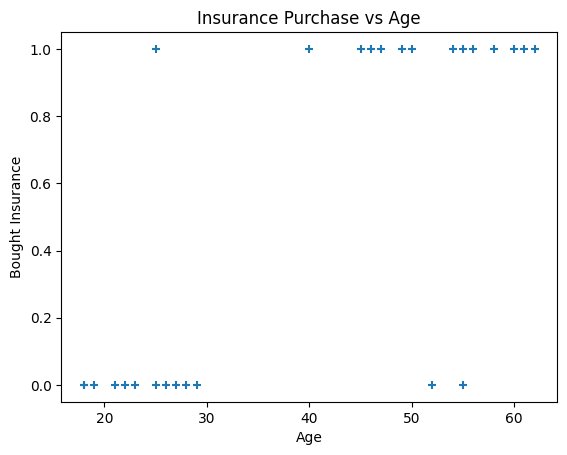

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker="+")
plt.xlabel("Age")
plt.ylabel("Bought Insurance")
plt.title("Insurance Purchase vs Age")
plt.show()


-  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df[["age"]],df.bought_insurance,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
obj = LogisticRegression()

In [ ]:
obj.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Predict on test set
obj.predict(X_test)

array([1, 0, 0, 0, 1, 1])

In [ ]:
# Predict for a specific age
obj.predict([[50]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
print(f"Model Coefficients: {obj.coef_}")

Model Coefficients: [[0.15492917]]


In [ ]:
print(f"Model Intercept: {obj.intercept_}")

Model Intercept: [-5.61387453]


In [ ]:
#logit
#y=mx+c
#sigmoid = 1 / 1+ e^-x
import math
def sig(x):
    y = 1 / (1+math.exp(-x))
    return y

In [ ]:
def pred(age):
    z = obj.coef_ * age + obj.intercept_
    return sig(z)

In [ ]:
pred(50)

<ipython-input-19-db49394ff576>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = 1 / (1+math.exp(-x))


0.8940300752280912

In [ ]:
print(f"Accuracy Score: {obj.score(X_test, y_test)}")

Accuracy Score: 0.8333333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


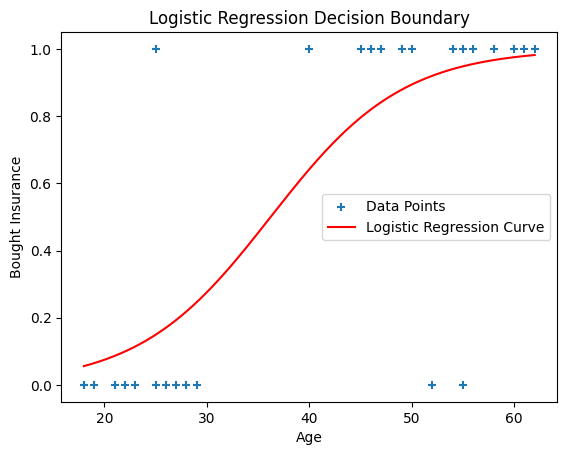

In [ ]:
x_values = np.linspace(df['age'].min(), df['age'].max(), 300).reshape(-1, 1)
y_values = obj.predict_proba(x_values)[:, 1]
plt.scatter(df.age, df.bought_insurance, marker='+', label="Data Points")
plt.plot(x_values, y_values, color='red', label="Logistic Regression Curve")
plt.xlabel("Age")
plt.ylabel("Bought Insurance")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()